In [1]:
%matplotlib inline
import pandas as pd
import cycluster as cy
import os.path as op
import numpy as np
import palettable
from custom_legends import colorLegend
import seaborn as sns
from hclusterplot import *
import matplotlib.pyplot as plt
import pprint
import openpyxl
from plotnine import *
# import preprocessing as prep
import scipy.cluster.hierarchy as sch
from matplotlib import cm
from matplotlib.gridspec import GridSpec
import sklearn
import matplotlib as mpl
import itertools
from scipy.spatial import distance
import os
import plotting as plot
import matplotlib.patches as mpatches

In [3]:
sns.set_context('paper')
path = "./"
inf = "Flu09 NW Data.csv"
dataFilename = op.join(path,inf)

"""A long df has one analyte measurement per row"""
longDf = pd.read_csv(dataFilename)


#splitVar = "Age"
#splitCrit = 

# longDf['Sample']=longDf['ID'].astype(str)+'_'+longDf['Strain']# longDf = longDf.drop(columns= ['ID', 'Influenza.Status', 'Strain', 'Age', 'Sex', 'CMV.Status', 'EBV.Status', 'HSV1_2.Status', 'HHV6.Status', 'VZV.Status'])

Selection = "HSV1_2"
Age_Selection = (17, 65)

# longDf = longDf.loc[longDf.Strain.isin(['{}'.format(Selection)])]
# longDf = longDf.loc[longDf.Age.isin(list(range(Age_Selection[0], Age_Selection[1])))]
# longDf = longDf.loc[~longDf.Age.isin(list(range(0,15)))]
# longDf = longDf.loc[longDf.HSV1_2.isin([1])]
# longDf = longDf.loc[longDf.Sex.isin(['F'])]


# longDf = longDf.drop(columns=['ID', 'Influenza.Status', 'Age', 'Sex', 'CMV', 'EBV', 'HSV1_2', 'HHV6', 'VZV'])
# longDf = longDf.drop(columns=['ID', 'Influenza.Status', 'Strain', 'Sex','Age', 'CMV.Status', 'EBV.Status', 'HSV1_2.Status', 'HHV6.Status', 'VZV.Status'])



# longDf = longDf.drop(columns= ["Strain"])




# Df_1 = longDf.pivot_table(index='Sample')
# #Df.to_excel('Example_1.xlsx')
# #Df


longDf = longDf.drop(columns= ['SJ', 'Season', 'Type'])
longDf = longDf.loc[longDf.Day.isin([0])]
longDf = longDf.drop(columns= ['Day'])
Df = longDf.pivot_table(index='Sample')

LogDf = Df.apply(func=np.log,axis=0)
LogDf
# LogDf.to_excel('Ontologix_Test.xlsx')

EGF   Eotaxin      FGF2       FKN  Flt3 Ligand      GCSF  \
Sample                                                                  
1001    4.902753  3.371082  3.858833  6.230973     1.867176  4.967171   
1002    3.376905  3.938275  1.912501  2.436241     1.153732  0.494696   
1003    2.137710  1.826161  1.912501  2.173615     1.153732  1.508512   
1004    4.153085  3.125444  3.858833  4.883786     2.738256  8.405179   
1005    3.093766  0.810930  1.432701  2.955951     1.144223  0.951658   
1006    2.445819  1.826161  1.912501  2.839078     1.752672  0.494696   
1007    4.496582  1.826161  1.912501  3.570377     1.697449  2.589267   
1008    1.599388  0.810930  1.432701  2.844328     1.144223  2.488234   
1009    3.308717  1.826161  1.912501  2.998728     1.637053  2.728506   
1010    2.142416  1.826161  1.912501  2.173615     1.153732  0.494696   
1011    2.065596  0.810930  2.070653  2.883123     1.175573  3.408173   
1012    3.091497  1.826161  1.912501  3.524889     1.903599  0.494696   
1013    3.408835  1.826161  1.912501  2.173615     1.153732  0.494696   
1014    2.137710  1.826161  1.912501  2.654649     1.153732  0.494696   
1015    2.973487  1.826161  1.912501  2.436241     1.153732  4.801148   
1016    3.013081  1.826161  1.912501  2.173615     1.153732  0.494696   
1017    4.759692  1.826161  1.912501  4.109069     2.034706  1.451614   
1018    2.137710  1.826161  1.912501  2.654649     1.153732  0.494696   
1019    3.690378  1.826161  1.912501  3.939249     1.950187  3.002708   
1020    3.332205  1.826161  1.912501  2.839078     1.506297  0.494696   
1021    6.890711  4.847803  4.126005  4.714114     2.966818  9.541929   
1022    3.034472  1.826161  1.912501  2.173615     1.153732  1.536867   
1023    2.137710  1.826161  1.912501  2.173615     1.153732  0.494696   
1024    2.137710  1.826161  2.888704  4.521354     1.806648  4.546269   
1025    3.169265  1.826161  1.912501  2.839078     1.153732  0.494696   
1026    0.797507  0.810930  1.432701  1.178655     0.896088  0.122218   
1027    5.765724  3.540959  4.525477  5.529588     3.569814  8.476244   
1028    2.137710  1.826161  1.912501  3.807329     1.637053  3.994340   
1029    3.672242  1.826161  1.912501  2.436241     1.506297  2.006871   
1030    2.137710  1.826161  1.912501  2.173615     1.153732  0.494696   
...          ...       ...       ...       ...          ...       ...   
5032    2.843746  1.078410  1.430311  2.706716     1.124930  0.854415   
5033    3.360723  1.078410  1.430311  3.435277     1.124930  1.945910   
5034    4.893502  3.745732  4.123094  4.107425     2.660260  7.708860   
5035    5.014561  2.318458  1.702928  3.402197     1.124930  2.793004   
5036    3.558201  1.078410  1.430311  1.660131     1.124930  1.601406   
5037    1.111858  1.078410  1.430311  2.071913     1.124930  0.712950   
5038    2.892592  1.078410  1.430311  1.329724     1.124930  0.712950   
5039    1.111858  1.078410  1.430311  1.329724     1.124930  0.712950   
5040    3.918204  1.078410  1.430311  1.888584     1.124930  0.943906   
5041    3.775974  1.078410  1.430311  1.329724     1.124930  0.712950   
5042    1.111858  1.078410  1.430311  1.660131     1.124930  0.712950   
5043    1.111858  1.078410  1.430311  1.329724     1.124930  0.712950   
5044    5.126995  4.587312  3.579901  4.223617     1.633154  8.904223   
5045    3.466985  1.078410  1.430311  1.983756     1.124930  0.712950   
5046    3.994340  1.078410  1.430311  2.706716     1.124930  3.500137   
5047    4.372986  1.324419  1.430311  3.554205     1.124930  1.348073   
5048    5.151845  3.775286  3.641788  3.942746     1.951608  8.553525   
5049    3.666122  1.078410  1.430311  1.660131     1.124930  0.712950   
5050    3.994340  1.078410  2.000128  4.069881     1.249902  2.191654   
5051    1.111858  1.078410  1.430311  1.329724     1.124930  0.712950   
5052    1.986504  1.078410  1.430311  1.329724     1.124930  0.712950   
5053    4.715100  2.129421  2.929058  3.402197     1.124930  7.144407  

In [4]:
def meanSubNormalize(cyDf, cyVars=None, compCommVars=None, meanVar=None):
    """Normalize cytokine columns by the log-mean for each patient, within each compartment.
    The point is that if cytokine concentrations are generally high for one sample or another,
    this might dominate the covariation of cytokines across patients (both within/across compartments).

    We subtract off the mean since the "overall inflamation" level
    that we are adjusting for would probably be on the fold-change concentration scale.
    (additive on the log-concentration scale)"""
    def _normFuncSub(vec):
        out = vec - muVec
        return out

    if cyVars is None:
        cyVars = cyDf.columns
    if meanVar is None:
        meanVar = 'Mean'
    if compCommVars is None:
        cyDf.columns

    """No standardizing cytokines before taking the mean (need units to stay in log-concentration)"""
    muVec = cyDf[cyDf.columns].mean(axis=1)
    
    ndf = cyDf.copy()
    ndf.loc[:, cyDf.columns] = ndf[cyDf.columns].apply(_normFuncSub)
    ndf.loc[:, meanVar] = muVec
    return ndf



# Df_values = longDf.drop(columns="Sample")
# Df_values = Df_values.drop(columns="GRO")
# print(Df_values)
# muVec = Df_values[Df_values.columns].mean(axis=1)
# print(Df_values[Df_values.columns])
# print(muVec)
# print(Df_values.isnull().sum())
df_prep = meanSubNormalize(LogDf)
df_prep = df_prep.drop(columns = "Mean")
print(df_prep)

             EGF   Eotaxin      FGF2       FKN  Flt3 Ligand      GCSF  \
Sample                                                                  
1001    1.985139  0.453468  0.941219  3.313359    -1.050438  2.049557   
1002    2.216882  2.778253  0.752479  1.276219    -0.006291 -0.665326   
1003    1.035630  0.724081  0.810421  1.071535     0.051652  0.406432   
1004    0.353858 -0.673783  0.059606  1.084559    -1.060971  4.605953   
1005    2.164013 -0.118823  0.502947  2.026198     0.214470  0.021905   
1006    1.203468  0.583810  0.670150  1.596727     0.510321 -0.747655   
1007    2.776704  0.106283  0.192623  1.850500    -0.022429  0.869389   
1008    0.420587 -0.367870  0.253900  1.665527    -0.034578  1.309434   
1009    1.876386  0.393830  0.480170  1.566397     0.204722  1.296175   
1010    1.058577  0.742321  0.828661  1.089775     0.069892 -0.589143   
1011    0.955680 -0.298986  0.960737  1.773207     0.065657  2.298257   
1012    1.761522  0.496186  0.582527  2.194914     

In [32]:
def computeGapStat(data, pdistFunc, clusterFunc, maxK, bootstraps=10):
    """Compute the gap statistic, varying the number of clusters (K)
    to determine the optimal number of clusters.

    The optimal number of clusters is the smallest K for which:

    $Gap(k) - (Gap(k+1) - \sigma_{k+1}) > 0$

    The statistic is described here:
    Tibshirani, R., Walther, G., Hastie, T., 2001. Estimating the number of clusters in a data set via the gap statistic.
        J. R. Stat. Soc. Ser. B. (Statistical Methodol.) 63, 411-423

    and a good example of python code is here:
    https://datasciencelab.wordpress.com/2013/12/27/finding-the-k-in-k-means-clustering/


    Parameters
    ----------
    data : np.array or pd.DataFrame
        Matrix of data with observations on the rows and variables along the columns.
        Data will be row-bootstrapped for each column to create null datasets.
    pdistFunc : function
        Function for computing pairwise distance matrix from data.
        Use partial to prespecify metric arguments if neccessary.
    clusterFunc : function
        Function that takes the distance matrix and a prespecified number of clusters
        and returns cluster labels.
        Use partial to prespecify method arguments if neccessary.
    maxK : int
        Maximum number of clusters to consider.
    bootstraps : int
        Number of bootstrap samples to compute for each K.

    Returns
    -------
    lsICD : np.array of shape (maxK,)
        Log of the sum of the intra cluster distances (LSICD), for each K
    mBSICD : np.array of shape (maxK,)
        Average LSICD over random bootstraps, for each K
    errBSICD : np.array of shape (maxK,)
        Bootstrap error LSICD over random bootstraps, for each K
    gap : np.array of shape (maxK,)
        Gap statistic for each K
    """
    dmat = pdistFunc(data)

    lsICD = np.zeros(maxK)
    mBSICD = np.zeros(maxK)
    stdBSICD = np.zeros(maxK)

    for K in (np.arange(maxK) + 1):
        labels = clusterFunc(dmat, K)
        lsICD[K - 1] = np.log(_intra_cluster_distances(dmat, labels))
        reps = np.zeros(bootstraps)
        for i in range(bootstraps):
            tmpDmat = pdistFunc(_bootstrap_each_column(data))
            labels = clusterFunc(tmpDmat, K)
            reps[i] = np.log(_intra_cluster_distances(tmpDmat, labels))
        mBSICD[K - 1] = reps.mean()
        stdBSICD[K - 1] = reps.std()

    gap = mBSICD - lsICD
    errBSICD = np.sqrt(1 + 1. / bootstraps) * stdBSICD

    return lsICD, mBSICD, errBSICD, gap

def _intra_cluster_distances(dmat, labels):
    """Sum of the intra-cluster distances (Wk)"""
    K = len(np.unique(labels))
    tot = 0
    for k in np.unique(labels):
        ind = labels == k
        nk = ind.sum()
        if isinstance(dmat, pd.DataFrame):
            tot += (dmat.loc[ind, :].loc[:, ind].values.flatten() ** 2).sum() / (2 * nk)
        else:
            tot += (dmat[ind, :][:, ind].flatten() ** 2).sum() / (2 * nk)
    return tot

def _bootstrap_each_column(d):
    """Returns a copy of data with row-bootstraped values
    substituted for each column independently."""
    out = d.copy()

    if isinstance(out, pd.DataFrame):
        out = out.apply(lambda col: col[np.floor(np.random.rand(len(col)) * len(col)).astype(int)], axis=0, raw=True)
    else:
        for ci in range(d.shape[1]):
            rind = np.floor(np.random.rand(d.shape[0]) * d.shape[0]).astype(int)
            out[:, ci] = out[rind, ci]

    return out



Gap = computeGapStat(df_prep, cy.corrDmatFunc, cy.hierClusterFunc, 30, bootstraps=10)
print(Gap[3])

[-0.16151279  0.41175228  0.62817122  0.83544501  0.86483748  0.91509327
  1.03845015  1.1352138   1.26822787  1.31017859  1.36326223  1.42014184
  1.45299916  1.48787202  1.53125569  1.5736908   1.63691858  1.68002528
  1.75134526  1.81321517  1.86888955  1.93093794  2.00691355  2.09378481
  2.16973782  2.18461899  2.26391123  2.38117796  2.46295289  2.52707813]


C:\Users\NBrah\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


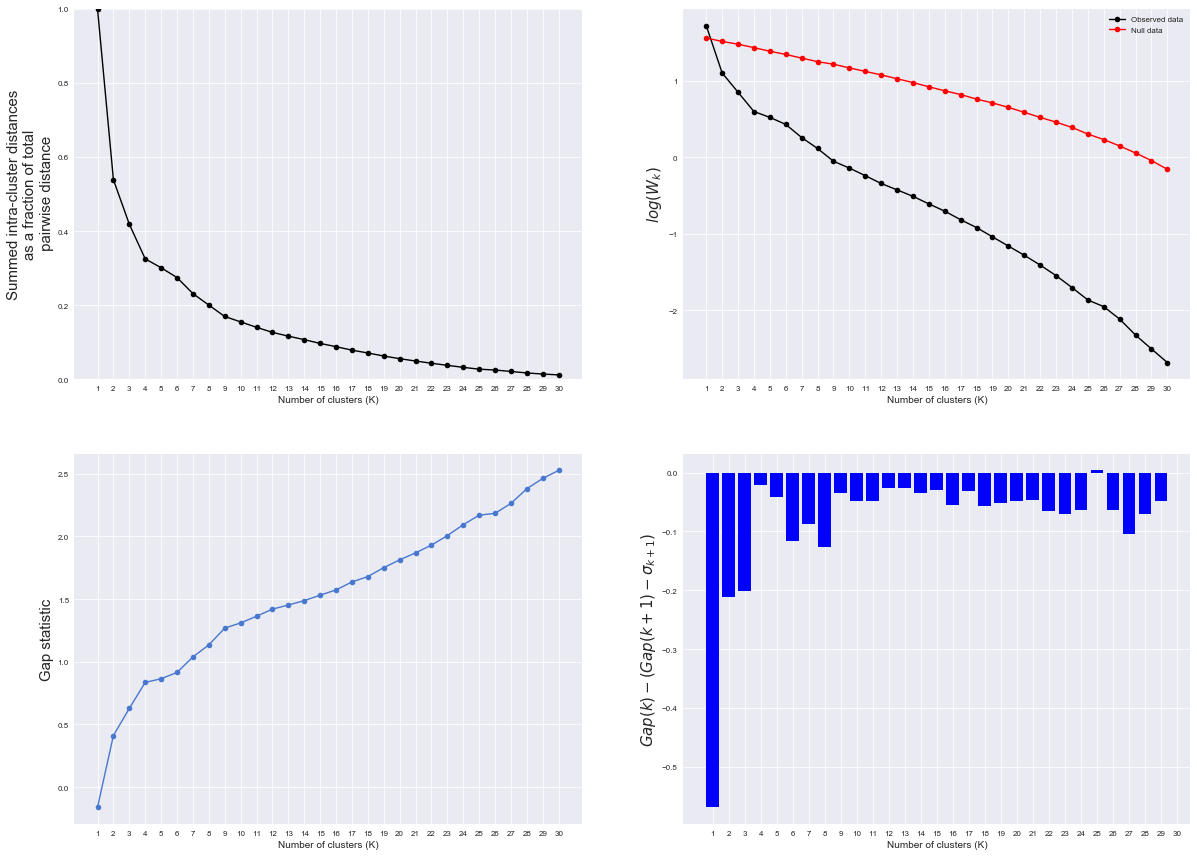

In [33]:
def plotGapStat(lsICD, mBSICD, errBSICD, gap, filename, savefile = False):
    """Descriptive plot of the Gap statistic.
    Parameters are simply the output from computeGapStat."""

    maxK = len(gap)
    plt.clf()
    plt.subplot(2, 2, 1)
    plt.plot(np.arange(maxK) + 1, np.exp(lsICD) / np.exp(lsICD[0]), 'o-', color='black', label='Observed data')
    plt.xticks(np.arange(maxK) + 1)
    plt.ylabel('Summed intra-cluster distances\nas a fraction of total\n pairwise distance', fontsize = 15)
    plt.xlabel('Number of clusters (K)', fontsize = 10)
    plt.ylim((0, 1))

    plt.subplot(2, 2, 2)
    plt.plot(np.arange(maxK) + 1, lsICD, 'o-', color='black', label='Observed data')
    plt.plot(np.arange(maxK) + 1, mBSICD, 'o-', color='red', label='Null data')
    plt.xticks(np.arange(maxK) + 1)
    plt.ylabel('$log(W_k)$', fontsize = 15)
    plt.xlabel('Number of clusters (K)', fontsize = 10)
    plt.legend(loc=0)

    plt.subplot(2, 2, 3)
    plt.plot(np.arange(maxK) + 1, gap, 'o-')
    plt.xticks(np.arange(maxK) + 1)
    plt.ylabel('Gap statistic', fontsize = 15)
    plt.xlabel('Number of clusters (K)', fontsize = 10)

    plt.subplot(2, 2, 4)
    q = gap[:-1] - (gap[1:] - errBSICD[1:])
    plt.bar(left=np.arange(maxK - 1) + 1, height=q, color='blue', align='center')
    plt.xticks(np.arange(maxK) + 1)
    plt.ylabel('$Gap(k) - (Gap(k+1) - \sigma_{k+1})$', fontsize = 15)
    plt.xlabel('Number of clusters (K)', fontsize = 10)
    # plt.tight_layout()
    if savefile:
        for file in os.listdir("./Flu09"):
            if file == filename+'.png':
                raise Exception('Directory already contains a file with this filename!')
            else:
                path = "./Flu09/"
                file_name = op.join(path, filename+'.png')
                plt.savefig(file_name)
plt.figure(figsize = (20,15))

    
plotGapStat(Gap[0], Gap[1], Gap[2], Gap[3],
            filename = 'Flu09 NW Unadjusted Gap Stat',
            savefile = False)


In [5]:

"""A wide df has one sample per row (analyte measurements across the columns)"""



def _prepCyDf(tmp, K=3, normed=False, cluster="Cluster", percent= 0, rtol= None, atol= None):
#     dayDf = longDf
#     tmp = tmp.pivot_table(index='ptid', columns='cytokine', values='log10_conc')
    if rtol or atol == None:
        noVar = tmp.columns[np.isclose(tmp.std(), 0)].tolist()
    else:
        noVar = tmp.columns[np.isclose(tmp.std(), 0, rtol, atol)].tolist()
    naCols = tmp.columns[(tmp.isnull().sum()) / (((tmp.isnull()).sum()) + (tmp.notnull().sum())) > (percent / 100)].tolist() 
    keepCols = [c for c in tmp.columns if not c in (noVar + naCols)]
#     dayDf = dayDf.pivot_table(index='ptid', columns='cytokine', values='log10_conc')[keepCols]
    """By setting normed=True the data our normalized based on correlation with mean analyte concentration"""
    rcyc = cy.cyclusterClass(studyStr='ADAMTS', sampleStr=cluster, normed=normed, rCyDf=tmp)
    rcyc.clusterCytokines(K=K, metric='pearson-signed', minN=0)
    rcyc.printModules()
    return rcyc
        

rcyc = _prepCyDf(df_prep, K=5, normed=False, cluster="All", percent= 10)




All1
IL15
IL7
PDGFABBB
TGFa
sCD40L

All2
IL1b
IL6
MIP1a
MIP1b
RANTES
TNFa
VEGF

All3
EGF
FKN
GCSF
IFNa2
IL10
IL1Ra2
IL1a
IL8
MCP1
PDGFAA

All4
Eotaxin
FGF2
MDC

All5
Flt3 Ligand
GMCSF
IFNg
IL12p40
IL12p70
IL13
IL17A
IL2
IL3
IL4
IL5
IL9
MCP3
TNFb



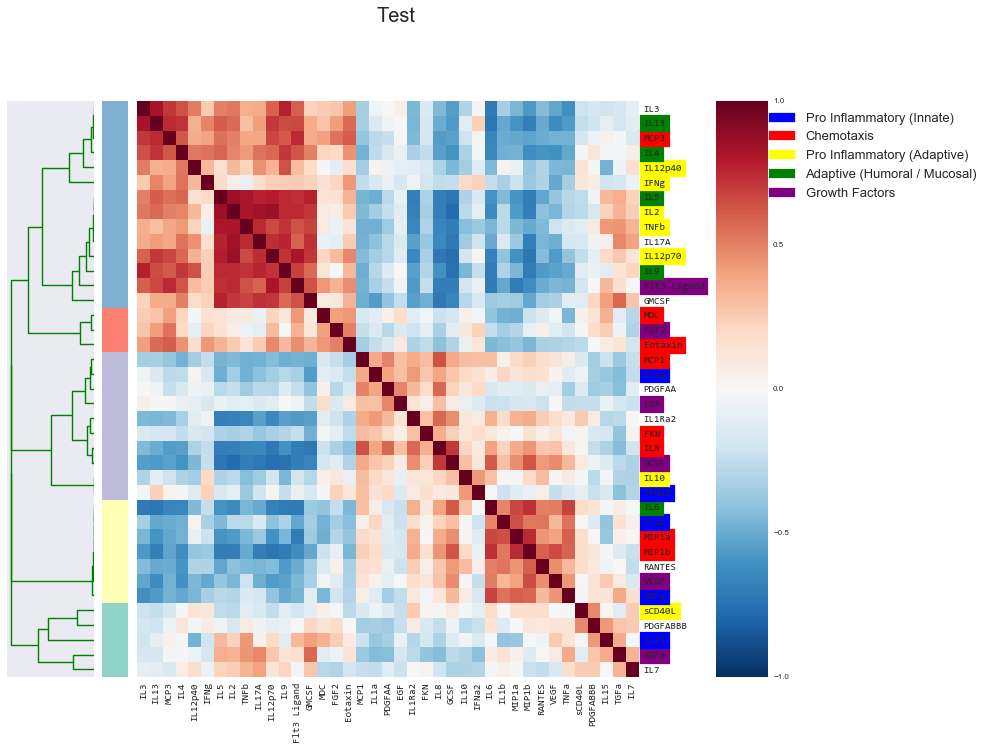

In [6]:
def _colors2labels(labels, setStr = 'Set3', cmap = None):
    """Return pd.Series of colors based on labels"""
    if cmap is None:
        N = max(3, min(12, len(np.unique(labels))))
        cmap = palettable.colorbrewer.get_map(setStr, 'Qualitative', N).mpl_colors
    cmapLookup = {k:col for k, col in zip(sorted(np.unique(labels)), itertools.cycle(cmap))}
    return labels.map(cmapLookup.get)
def _clean_axis(ax):
    """Remove ticks, tick labels, and frame from axis"""
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in list(ax.spines.values()):
        sp.set_visible(False)
    ax.grid(False)
    # ax.set_axis_bgcolor('white')
def plotHierClust(dmatDf, Z, cmap, vRange, filename, savefile=False, labels=None, titleStr=None, tickSz= 10, cmapLabel=''):
    """Display a hierarchical clustering result."""
    
    vmin, vmax = vRange
    fig = plt.gcf()
    fig.clf()

    if labels is None:
        denAX = fig.add_subplot(GridSpec(1, 1, left=0.05, bottom=0.05, right=0.15, top=0.85)[0, 0])
        heatmapAX = fig.add_subplot(GridSpec(1, 1, left=0.16, bottom=0.05, right=0.78, top=0.85)[0, 0])
        scale_cbAX = fig.add_subplot(GridSpec(1, 1, left=0.87, bottom=0.05, right=0.93, top=0.85)[0, 0])
    else:
        denAX = fig.add_subplot(GridSpec(1, 1, left=0.05, bottom=0.05, right=0.15, top=0.85)[0, 0])
        cbAX = fig.add_subplot(GridSpec(1, 1, left=0.16, bottom=0.05, right=0.19, top=0.85)[0, 0])
        heatmapAX = fig.add_subplot(GridSpec(1, 1, left=0.2, bottom=0.05, right=0.78, top=0.85)[0, 0])
        scale_cbAX = fig.add_subplot(GridSpec(1, 1, left=0.87, bottom=0.05, right=0.93, top=0.85)[0, 0])

    my_norm = mpl.colors.Normalize(vmin = vmin, vmax = vmax)

    """Dendrogaram along the rows"""
    plt.sca(denAX)
    denD = sch.dendrogram(Z, p = 2, truncate_mode = 'none', color_threshold=np.inf, orientation='left')
    colInd = denD['leaves']
    _clean_axis(denAX)

    if not labels is None:
        cbSE = _colors2labels(labels)
        axi = cbAX.imshow([[x] for x in cbSE.iloc[colInd].values], interpolation='nearest', aspect='auto', origin='lower')
        
        _clean_axis(cbAX)

    """Heatmap plot"""
    axi = heatmapAX.imshow(dmatDf.values[colInd,:][:, colInd], interpolation='nearest', aspect='auto', origin='lower', norm=my_norm, cmap=cmap)
    _clean_axis(heatmapAX)

    """Column tick labels along the rows"""
    if tickSz is None:
        heatmapAX.set_yticks(())
        heatmapAX.set_xticks(())
    else:
        heatmapAX.set_yticks(np.arange(dmatDf.shape[1]))
        heatmapAX.yaxis.set_ticks_position('right')
        heatmapAX.set_yticklabels(dmatDf.columns[colInd], fontsize=tickSz, fontname='Consolas')

        """Column tick labels"""
        heatmapAX.set_xticks(np.arange(dmatDf.shape[1]))
        heatmapAX.xaxis.set_ticks_position('top')
        xlabelsL = heatmapAX.set_xticklabels(dmatDf.columns[colInd], fontsize=tickSz, rotation=90, fontname='Consolas')

#         """Remove the tick lines"""
#         for l in heatmapAX.get_xticklines() + heatmapAX.get_yticklines(): 
#             l.set_markersize(0)

    
    """Assign cytokines to groups and change their color on the y-axis"""
    pro_inflammatory_innate = ['IFNa2', 'IL15', 'IL17a', 'IL18', 'IL1a', 'IL1b', 'IP10', 'TNFa', 'IL-IRa']
    chemotaxis = ['Eotaxin', 'FKN', 'GRO', 'IL8', 'MCP1', 'MCP3', 'MDC', 'MIP1a', 'MIP1b']
    pro_inflammatory_adaptive = ['IFNg', 'IL2', 'IL10', 'IL12p40', 'IL12p70', 'sCD40L', 'TNFb']
    adaptive = ['IL4', 'IL5', 'IL6', 'IL9', 'IL13']
    growth_factors = ['EGF', 'FGF2', 'Flt3 Ligand', 'GCSF', 'TGFa', 'VEGF']
        
    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in pro_inflammatory_innate:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('blue')
    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in chemotaxis:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('red')
    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in pro_inflammatory_adaptive:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('yellow')
    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in adaptive:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('green')
    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in growth_factors:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('purple')

    """Add Legend for Cytokine Groups"""
    pro_inflammatory_innate_legend = mpatches.Patch(color = 'blue', label = 'Pro Inflammatory (Innate)')
    chemotaxis_legend = mpatches.Patch(color = 'red', label = 'Chemotaxis')
    pro_inflammatory_adaptive_legend = mpatches.Patch(color = 'yellow', label = 'Pro Inflammatory (Adaptive)')
    adaptive_legend = mpatches.Patch(color = 'green', label = 'Adaptive (Humoral / Mucosal)')
    growth_factors_legend = mpatches.Patch(color = 'purple', label = 'Growth Factors')
    heatmapAX.legend(handles = [pro_inflammatory_innate_legend, chemotaxis_legend, pro_inflammatory_adaptive_legend, adaptive_legend, growth_factors_legend], bbox_to_anchor = (1.7, 1), fontsize = 13)
                
    
    """Add a colorbar"""
    cb = fig.colorbar(axi, scale_cbAX) # note that we could pass the norm explicitly with norm=my_norm
    cb.set_label(cmapLabel)
    cb.set_ticks([-1, -0.5, 0, 0.5, 1])
    """Make colorbar labels smaller"""
    for t in cb.ax.yaxis.get_ticklabels():
        t.set_fontsize('small')
    heatmapAX.xaxis.tick_bottom()
    heatmapAX.invert_xaxis()
    if titleStr:
        plt.suptitle(titleStr, fontsize = 20)
    if savefile:
        for file in os.listdir("./Correlation Plots"):
            if file == filename+'.png':
                raise Exception('Directory already contains a file with this filename!')
            else:
                path = "./Correlation Plots/"
                file_name = op.join(path, filename+'.png')
                plt.savefig(file_name)
plt.figure(figsize = (12,10))


        
plotHierClust(rcyc.cyDf.corr(method="pearson", min_periods=1), 
              rcyc.Z, 
              filename = 'Test',
              cmap = palettable.colorbrewer.diverging.RdBu_11_r.mpl_colormap, 
              vRange = (-1, 1), labels = rcyc.labels, 
              titleStr = "Test",
              savefile = False)

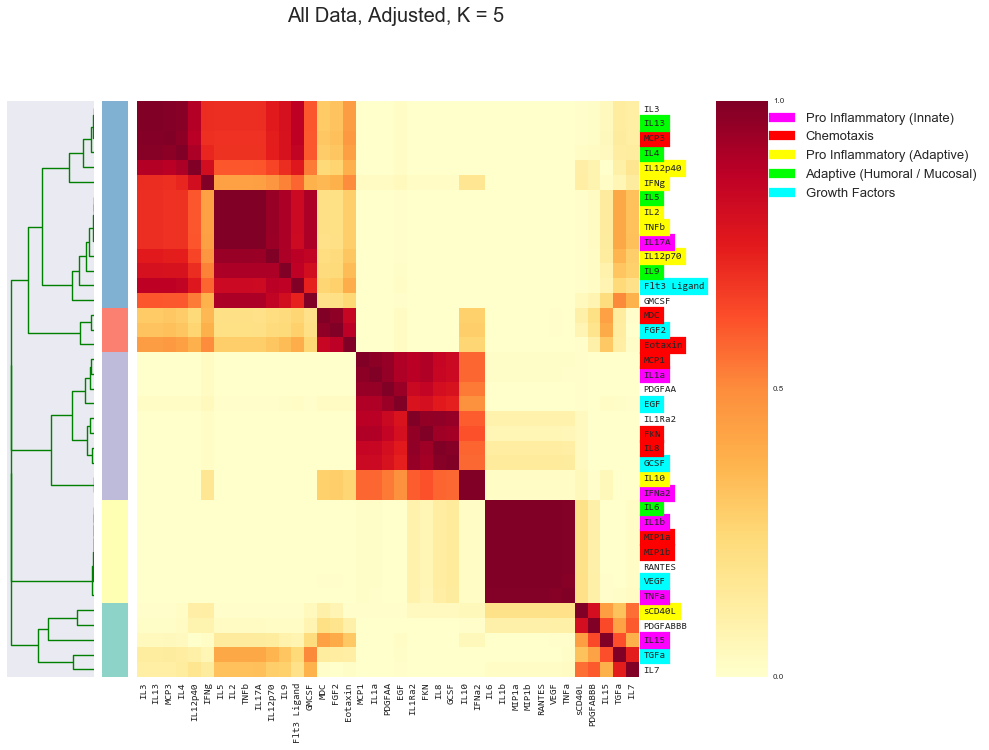

In [8]:
# plt.figure(43, figsize = (15.5, 9.5))
# colInds = plot.plotHierClust(1 - rcyc.pwrel,
#                                rcyc.Z,
#                                labels=rcyc.labels,
#                                titleStr='Pairwise reliability',
#                                vRange=(0, 1),
#                                tickSz='large')


def _colors2labels(labels, setStr = 'Set3', cmap = None):
    """Return pd.Series of colors based on labels"""
    if cmap is None:
        N = max(3, min(12, len(np.unique(labels))))
        cmap = palettable.colorbrewer.get_map(setStr, 'Qualitative', N).mpl_colors
    cmapLookup = {k:col for k, col in zip(sorted(np.unique(labels)), itertools.cycle(cmap))}
    return labels.map(cmapLookup.get)
def _clean_axis(ax):
    """Remove ticks, tick labels, and frame from axis"""
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    for sp in list(ax.spines.values()):
        sp.set_visible(False)
    ax.grid(False)
    # ax.set_axis_bgcolor('white')
def plotHierClust(dmatDf, Z, cmap, vRange, filename, savefile=False, labels=None, titleStr=None, tickSz= 10, cmapLabel=''):
    """Display a hierarchical clustering result."""
    
    vmin, vmax = vRange
    fig = plt.gcf()
    fig.clf()

    if labels is None:
        denAX = fig.add_subplot(GridSpec(1, 1, left=0.05, bottom=0.05, right=0.15, top=0.85)[0, 0])
        heatmapAX = fig.add_subplot(GridSpec(1, 1, left=0.16, bottom=0.05, right=0.78, top=0.85)[0, 0])
        scale_cbAX = fig.add_subplot(GridSpec(1, 1, left=0.87, bottom=0.05, right=0.93, top=0.85)[0, 0])
    else:
        denAX = fig.add_subplot(GridSpec(1, 1, left=0.05, bottom=0.05, right=0.15, top=0.85)[0, 0])
        cbAX = fig.add_subplot(GridSpec(1, 1, left=0.16, bottom=0.05, right=0.19, top=0.85)[0, 0])
        heatmapAX = fig.add_subplot(GridSpec(1, 1, left=0.2, bottom=0.05, right=0.78, top=0.85)[0, 0])
        scale_cbAX = fig.add_subplot(GridSpec(1, 1, left=0.87, bottom=0.05, right=0.93, top=0.85)[0, 0])

    my_norm = mpl.colors.Normalize(vmin = vmin, vmax = vmax)

    """Dendrogaram along the rows"""
    plt.sca(denAX)
    denD = sch.dendrogram(Z, p = 2, truncate_mode = 'none', color_threshold=np.inf, orientation='left')
    colInd = denD['leaves']
    _clean_axis(denAX)

    if not labels is None:
        cbSE = _colors2labels(labels)
        axi = cbAX.imshow([[x] for x in cbSE.iloc[colInd].values], interpolation='nearest', aspect='auto', origin='lower')
        
        _clean_axis(cbAX)

    """Heatmap plot"""
    axi = heatmapAX.imshow(dmatDf.values[colInd,:][:, colInd], interpolation='nearest', aspect='auto', origin='lower', norm=my_norm, cmap=cmap)
    _clean_axis(heatmapAX)

    """Column tick labels along the rows"""
    if tickSz is None:
        heatmapAX.set_yticks(())
        heatmapAX.set_xticks(())
    else:
        heatmapAX.set_yticks(np.arange(dmatDf.shape[1]))
        heatmapAX.yaxis.set_ticks_position('right')
        heatmapAX.set_yticklabels(dmatDf.columns[colInd], fontsize=tickSz, fontname='Consolas')

        """Column tick labels"""
        heatmapAX.set_xticks(np.arange(dmatDf.shape[1]))
#         heatmapAX.xaxis.set_ticks_position('top')
        xlabelsL = heatmapAX.set_xticklabels(dmatDf.columns[colInd], fontsize=tickSz, rotation=90, fontname='Consolas')
        
    """Assign cytokines to groups and change their color on the y-axis"""
    pro_inflammatory_innate = ['IFNa2', 'IL15', 'IL17A', 'IL18', 'IL1a', 'IL1b', 'IP10', 'TNFa', 'IL-IRa']
    chemotaxis = ['Eotaxin', 'FKN', 'GRO', 'IL8', 'MCP1', 'MCP3', 'MDC', 'MIP1a', 'MIP1b']
    pro_inflammatory_adaptive = ['IFNg', 'IL2', 'IL10', 'IL12p40', 'IL12p70', 'sCD40L', 'TNFb']
    adaptive = ['IL4', 'IL5', 'IL6', 'IL9', 'IL13']
    growth_factors = ['EGF', 'FGF2', 'Flt3 Ligand', 'GCSF', 'TGFa', 'VEGF']

    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in pro_inflammatory_innate:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('magenta')
    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in chemotaxis:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('red')
    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in pro_inflammatory_adaptive:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('yellow')
    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in adaptive:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('lime')
    for i in range(0, len(heatmapAX.get_yticklabels())):
        if (heatmapAX.get_yticklabels()[i]).get_text() in growth_factors:
            heatmapAX.get_yticklabels()[i].set_backgroundcolor('cyan')
#     print(heatmapAX.get_yticklabels()[0].get_position())
    """Add Legend for Cytokine Groups"""
    pro_inflammatory_innate_legend = mpatches.Patch(color = 'magenta', label = 'Pro Inflammatory (Innate)')
    chemotaxis_legend = mpatches.Patch(color = 'red', label = 'Chemotaxis')
    pro_inflammatory_adaptive_legend = mpatches.Patch(color = 'yellow', label = 'Pro Inflammatory (Adaptive)')
    adaptive_legend = mpatches.Patch(color = 'lime', label = 'Adaptive (Humoral / Mucosal)')
    growth_factors_legend = mpatches.Patch(color = 'cyan', label = 'Growth Factors')
    heatmapAX.legend(handles = [pro_inflammatory_innate_legend, chemotaxis_legend, pro_inflammatory_adaptive_legend, adaptive_legend, growth_factors_legend], bbox_to_anchor = (1.7, 1), fontsize = 13)
    
#     plt.yticks(bbox = [[1, 0], [4, 3]])
    
#     mpatches.FancyBboxPatch((1, 0), 100, 4)
                
#         """Remove the tick lines"""
#         for l in heatmapAX.get_xticklines() + heatmapAX.get_yticklines(): 
#             l.set_markersize(0)

    """Add a colorbar"""
    cb = fig.colorbar(axi, scale_cbAX) # note that we could pass the norm explicitly with norm=my_norm
    cb.set_label(cmapLabel)
    cb.set_ticks([-1, -0.5, 0, 0.5, 1])

    """Make colorbar labels smaller"""
    for t in cb.ax.yaxis.get_ticklabels():
        t.set_fontsize('small')
    heatmapAX.xaxis.tick_bottom()
    heatmapAX.invert_xaxis()
    if titleStr:
        plt.suptitle(titleStr, fontsize = 20)
    if savefile:
        for file in os.listdir("./Flu09"):
            if file == filename+'.png':
                raise Exception('Directory already contains a file with this filename!')
            else:
                path = "./Flu09/"
                file_name = op.join(path, filename+'.png')
                plt.savefig(file_name, bbox_inches = 'tight')
plt.figure(figsize = (12,10))



        

plotHierClust(1 - rcyc.pwrel,
                    cy.hierClusterFunc(rcyc.pwrel, returnLinkageMat=True, method = "complete")[1],
                    labels=rcyc.labels,
                    titleStr='All Data, Adjusted, K = 5',
                    vRange=(0, 1),
                    cmap = cm.YlOrRd,
                    filename = 'All Data, Adjusted, K = 5',
                    savefile = False)

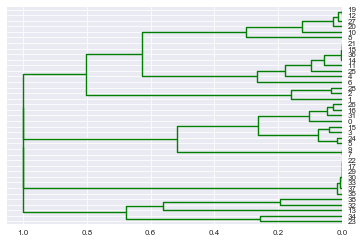

In [15]:
denD = sch.dendrogram(cy.hierClusterFunc(rcyc.pwrel, returnLinkageMat=True, method = "complete")[1], p = 2, truncate_mode = 'none', color_threshold=np.inf, orientation='left')
colInd = denD['leaves']


<Figure size 864x720 with 0 Axes>

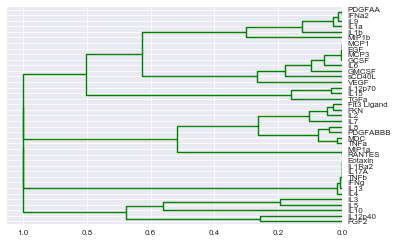

<Figure size 864x720 with 0 Axes>

In [22]:
denD_1 = sch.dendrogram(cy.hierClusterFunc(rcyc.pwrel, returnLinkageMat=True, method = "complete")[1], p = 2, truncate_mode = 'none', color_threshold=np.inf, orientation='left', labels = rcyc.pwrel.columns[colInd])
plt.savefig('Dendrogram_test.png', bbox_inches = 'tight')
plt.figure(figsize = (12, 10))


In [36]:
def moduleCorrRatio(cyDf, labels, cyVars=None, alpha=0.05, nstraps=10000):
    """Compute all pairwise intra- and inter-module cytokine correlation
    coefficients with their IQRs.

    Additionally compute the intra : inter ratio with 95% CI, where the
    ratio is of signed-pearson correlation coefficients transformed to
    the [0,1] interval with 0 meaning perfect anti-correlation
    and 1 meaning perfect correlation
    
    For ratio, uses a signed Pearson correlation coefficient since this is what is used
    for clustering. The disadvantage is that it can't be described as fractional
    variance, while the upside is that it captures the potential problem with
    forming modules of anti-correlated cytokines.

    Parameters
    ----------
    cyDf : pd.DataFrame [n_participants x n_cytokines]
        Raw or normalized analyte log-concentrations.
    labels : pd.Series
        Module labels for each analyte

    Returns
    -------
    intra : np.ndarray shape (3,)
        Vector containing 25th, 50th and 75th quantiles of all cytokine pairs within the same module.
    inter : np.ndarray shape (3,)
        Vector containing 25th, 50th and 75th quantiles of all cytokine pairs from different modules.
    ratio : np.ndarray shape (3,)
        Vector containing the intra : inter correlation ratio with bootstrap 95% CI or (1 - alpha)%
        [LB, ratio, UB]"""

    def ratioFunc(cyDf, intraMask, interMask):
        """smat is on the [0, 1] interval with 0 meaning perfect anti-correlation and 1 meaning perfect correlation"""
        smat = 1 - cy.corrDmatFunc(cyDf, metric='pearson-signed').values
        return np.nanmean((smat * intraMask).ravel()) / np.nanmean((smat * interMask).ravel())

    if cyVars is None:
        cyVars = cyDf.columns.tolist()

    """corrmat is on the [-1, 1] interval with 1 meaning perfect correlation and -1 meaning perfect anti-correlation"""
    corrmat = cyDf[cyVars].corr()

    intra = []
    inter = []
    intraMask = np.nan * np.zeros(corrmat.shape)
    interMask = np.nan * np.zeros(corrmat.shape)
    for a, b in itertools.combinations(cyVars, 2):
        if not a == b:
            s = corrmat.loc[a, b]
            i, j = cyVars.index(a), cyVars.index(b)
            if labels[a] == labels[b]:
                intra.append(s)
                intraMask[i, j] = 1.
            else:
                inter.append(s)
                interMask[i, j] = 1.

    intra = np.percentile(intra, q=[25, 50, 75])
    inter = np.percentile(inter, q=[25, 50, 75])

    if nstraps is None or nstraps == 0:
        return intra, inter
    
    else:
        rratios = np.zeros(nstraps)
        for strapi in range(nstraps):
            rratios[strapi] = ratioFunc(cyDf[cyVars].sample(frac=1, replace=True, axis=0), intraMask, interMask)
        ratio = np.percentile(rratios, [100*alpha/2, 50, 100*(1-alpha/2)])

        return intra, inter, ratio
    
moduleCorrRatio(rcyc.cyDf, rcyc.labels)




(array([0.67302865, 0.72879529, 0.75796345]),
 array([-0.32475297, -0.08132901,  0.20493475]),
 array([1.79575341, 1.82990487, 1.85973399]))

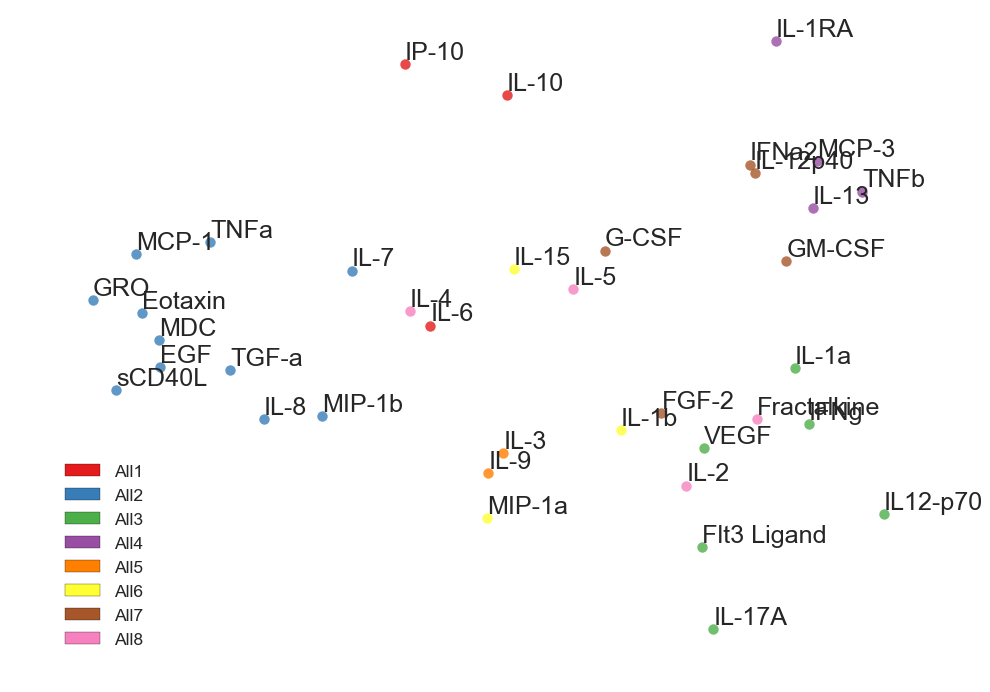

In [549]:
plt.figure(901, figsize=(13, 9.7))
plot.plotModuleEmbedding(rcyc.dmatDf, rcyc.labels, method='kpca', txtSize='large')
colors = palettable.colorbrewer.get_map('Set1', 'qualitative', len(np.unique(rcyc.labels))).mpl_colors
colorLegend(colors, ['%s%1.0f' % (rcyc.sampleStr, i) for i in np.unique(rcyc.labels)], loc='lower left')


In [15]:
import scipy.stats

"""df here should have one column per module and the genotype column"""
ptidDf = longDf[['ptid', 'sample', 'genotype', 'dpi']].drop_duplicates().set_index('ptid')
df = rcyc.modDf.join(ptidDf)

ind = df.genotype == 'WT'
col = 'LUNG1'
# stats.ranksums(df[col].loc[ind], df[col].loc[~ind])


